# 极限

## 极限（Limits）

函数的极限，描述的是输入值在接近一个特定值时函数的表现。

定义：我们若要称函数 $f(x)$ 在 $x=a$ 处的极限为 $L$ 即：$\lim_{x\rightarrow a}f(x)=L$，则需要：

对任意一个 $\epsilon > 0$，我们要能找到一个 $\delta > 0$ 使得当 $x$ 的取值满足 $0<|x-a|<\delta$ 时 $|f(x)-L|<\epsilon$

本节的重点内容其实是用 Python 画图...：

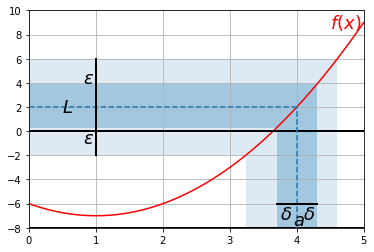

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

f = lambda x : x**2 - 2*x - 6
x = np.linspace(0, 5, 100)
y = f(x)

plt.plot(x, y, 'r')
plt.grid('on')

l = plt.axhline(-8, 0, 1, linewidth=2, color='black')
l = plt.axhline(0, 0, 1, linewidth=2, color='black')
l = plt.axhline(y=2,xmin=0,xmax=0.8,linestyle="--")
l = plt.axvline(x=4,ymin=0,ymax=float(5)/9, linestyle = "--")

l = plt.axhline(-6,3.7/5,4.3/5,linewidth = 2, color = 'black')
l = plt.axvline(1,6.0/18,14.0/18,linewidth = 2, color = 'black')

p = plt.axhspan(-2,6,0,(1+sqrt(13))/5,alpha = 0.15, ec = 'none')
p = plt.axvspan((1+sqrt(5)),(1+sqrt(13)),0,1.0/3,alpha = 0.15, ec = 'none')

p = plt.axhspan(f(3.7),f(4.3),0,4.3/5,alpha = 0.3, ec = 'none')
p = plt.axvspan(3.7,4.3,0,(f(3.7)+8)/18,alpha = 0.3, ec = 'none')

plt.axis([0,5,-8,10])

plt.text(0.8,-1,r"$\epsilon$", fontsize = 18)
plt.text(0.5,1.6,r"$L$", fontsize = 18)
plt.text(0.8,4,r"$\epsilon$", fontsize = 18)
plt.text(3.75,-7.3,r"$\delta$", fontsize = 18)
plt.text(4.1,-7.3,r"$\delta$", fontsize = 18)
plt.text(3.95,-7.8,r"$a$", fontsize = 18)
plt.text(4.5,8.5,r"$f(x)$", fontsize = 18,color="red")

plt.show()

下面尝试用上面的定义来证明 $\lim_{x\rightarrow 4} x^2 - 2x -6 = 2$：

依据定义，我们需要知道的是：对于任意 $\epsilon$，能找到一个 $\delta$ 使得：$0<\|{x-4}\|<\delta$ 时有 $\|f(x)-2\|<\epsilon$，注意到 $\|f(x)-2\|=\|x^2 -2x -6 -2\| = \|(x-4)(x+2)\| = \|x-4\|\cdot\|x+2\|$，其中我们已经知道 $\|x-4\|<\delta$

根据三角不等式有：$\|x+2\| = \|x-4+6\| \le \|x-4\| + 6 < \delta + 6$

因此 $\|f(x)-2\| = \|x-4\| \cdot \|x+2\| < \delta \cdot (\delta + 6)$

现在我们只需要找到一个 $\delta$ 满足 $\delta \cdot (\delta + 6) \le \epsilon$ 即可

动用一些中学时候的二元一次方程知识应该很容易证明这样的 $\delta>0$ 是存在的，或者我们只要令 $\delta=\min(1, \frac{\epsilon}{7})$ 即可使得 $\delta \le \frac{\epsilon}{7}$ 且 $\delta+6 \le 7$，因而 $\delta \cdot (\delta + 6) \le \epsilon$

Python 中求该极限方法如下：

In [12]:
import sympy

x = sympy.Symbol('x', real=True)
y = f(x)
print(y.limit(x, 4))

2


上图中的函数就是 $f(x)=x^2 -2x -6$ 且 $\epsilon=4, \delta=0.3$

## 函数的连续性

极限可以用来判断一个函数是否为连续函数。

当极限 $\lim_{x\rightarrow a}f(x)$ 存在，且 $\lim_{x\rightarrow a}f(x) = f(a)$ 时，称函数 $f(x)$ 在点 $x=a$ 处为连续的。 当一个函数在其定义域中任何一点处均连续，则称该函数是连续函数。

## 泰勒级数用于极限计算

我们在中学课本中一定记忆了常见的极限，以及极限计算的规则，这里我们便不再赘言。泰勒级数也可以用于计算一些形式比较复杂的函数的极限。这里，仅举一例：

$\lim_{x\rightarrow 0} \frac{\sin(x)}{x} = \lim_{x\rightarrow 0} \frac{\frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots}{x}$

$\qquad=\lim_{x\rightarrow 0} \frac{x (1-\frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!} + \cdots)}{x}$

$\qquad=\lim_{x\rightarrow 0} 1-\frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!} + \cdots$

$\qquad=1$


## 洛必达法则（I'Hopital's rule）

利用泰勒级数来计算极限，有时也会陷入困境，例如：求极限的位置是在我们不知道泰勒展开的位置，或者所求极限是无穷的。通常遇到这些情况我们会使用各种形式的洛必达法则，读者可以自行回顾一下这些情形，这里我们仅尝试说明 $\frac{0}{0}$ 形式的洛必达法则为何成立。

如果 $f$ 和 $g$ 是连续函数，且 $\lim_{x\rightarrow a}f(x)=0,\quad \lim_{x\rightarrow a}g(x)=0$ 。若 $\lim_{x\rightarrow a}\frac{f'(x)}{g'(x)}$  存在，则：

$\lim_{x\rightarrow a}\frac{f(x)}{g(x)}=\lim_{x\rightarrow a}\frac{f'(x)}{g'(x)}$

若分子分母同时求导后仍然是 $\frac{0}{0}$ 形式，那么便重复该过程，直至问题解决。 运用泰勒级数，我们很容易可以理解洛必达法则为什么会成立:

$\lim_{x\rightarrow a}{\frac{f(x)}{g(x)}}=\lim_{x\rightarrow a}{\frac{f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+\dots}{g(a)+\frac{g'(a)}{1!}(x-a)+\frac{g''(a)}{2!}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\dots}}$

$\qquad = \lim_{x\rightarrow a}{\frac{\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+\dots}{\frac{g'(a)}{1!}(x-a)+\frac{g''(a)}{2!}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\dots}}$

$\qquad =\lim_{x\rightarrow a}{\frac{f'(a)+\frac{f''(a)}{2!}(x-a)+\frac{f'''(a)}{3!}(x-a)^2+\dots}{g'(a)+\frac{g''(a)}{2!}(x-a)+\frac{g'''(a)}{3!}(x-a)^2+\dots}}$

$\qquad = \lim_{x\rightarrow a}\frac{f'(x)}{g'(x)}$

感兴趣的读者可以自己尝试去验证一下其他形式的洛必达法则。